# Welcome to *Exploration and identification of Bias in Synthetic Card Approval Dataset by Group E*

- Main references:
    - Ryan Daher & Prof Manoel Gadi: https://github.com/manoelgadi
    - AIF360: https://github.com/Trusted-AI/AIF360
    - Our team githubs:
        - Javier Nieves Remacha: https://github.com/jnremachaGH
        - Mohamad Rizk: https://github.com/MohamadRizk
        - Dareen Shaheen: https://github.com/Duchess1800
        - Ismael Ayat Ortiz: https://github.com/Ismmael
        - Ian Zaqueu: https://github.com/Ianzaqueu
        - Amanda Moles https://github.com/amandamolesm
- Test Pypi: https://test.pypi.org/project/fairdetect-group-e/
- Pypi: https://pypi.org/project/fairdetect-group-e/

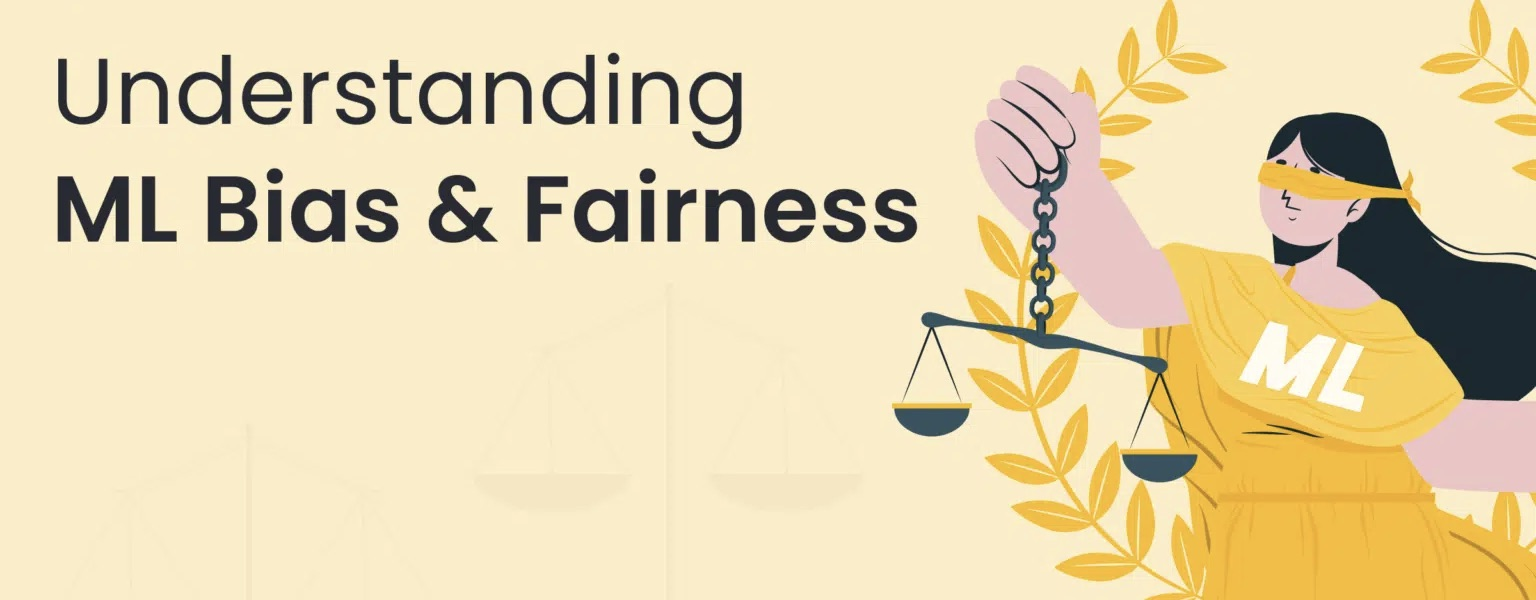

In [1]:
from IPython.display import Image
Image(filename='understanding_bias.jpeg')

﻿


  

## Description of project

  

The scope of the project is centred around the exploration of any potential bias in the Synthetic Card Approval Dataset, and the engagement of modelling using _FairDetect_ by Ryan Daher, a library developed by Group E and IBM’s AIF360. As Group E, our project seeks to identify potential biases in the rate of credit card approval given to customer within the dataset, due to a natural characteristic which places a group of customers at an unfair disadvantage in comparison to another group of customers within the same institution.


Ryan Daher, a former IE University student, engaged in the exploration of the case study in his final dissertation entitled _‘Transparent Unfairness: An Approach to Investigating Machine Learning Bias’_ - assuming using the same dataset. Within his project scope emerged the creation of a library entitled FairDetect.py, which contains tools for data analysis, model building and data exploration. It is on the basis of Ryan Daher’s package, that our group E has created a package which will focuses on better usability, increased speed and reliability of using the code through Jupyter Notebook in the exploration of bias. Finally, the use of IBM’s AIF360 - open source toolkit that helps examine, report, and mitigate discrimination and bias in machine learning models throughout the AI application lifecycle - is focused on ensuring that critical analysis of Ryan Daher’s ML model is achieved in order to ensure that the correct bias is identified and subsequently mitigated. The project shall implement the use of AIF360 in order to engage in a comparative analysis with Ryan Daher’s application of the FairDetect package, and ensure that results are following suit.

  
  

## Requirements


  

-   Matplotlib.pyplot
-   Numpy
-   Pandas
-   Seaborn
-   Image from IPython.Display

  

## Inside Group E’s package:

  

-   Train_test_split from sklearn.model_selection
-   Display from IPython.display
-   Declarative_base from sqlalchemy.ext.declarative
-   Column, Integer, String, DateTime, Float from sqlalchemy
-   Randrange from random
-   Make_subplots from plotly.subplots
-   Plotly.graph_objects
-   Dalex
-   Chi2_contingency from scipy.stats
-   Tabulate from tabulate
-   Confusion_matrix from sklearn.metrics
-   Chisquare from scipy.stats
-   Precision_score from sklearn.metrics
-   Accuracy_score from sklearn.metrics
-   MLPClassifier from sklearn.neural_network

  

## Installation:

-   AIF360 Tool kit (pip install)
-   FairDetect (pip install)
-   Group E library (pip install)

  

## Project Flow:

  

The flow of configuration and implementation is showcased in the jupyter notebook provided in the repository.

  

-   Begin with a pip installation of the libraries; FairDetect, Group E Library and the AIF360.
-   A clear EDA of the dataset is conducted

  

Begin by implementing Ryan Daher’s FairDetect model, with the use of Group E’s library.

 1.   Proceed with a preprocessing and splitting of the dataset by invoking functions already in Group E’s library
 2.   Proceed to train the ML Model prebuilt models such as 'LOG' (logistic regression), 'XGB' (xgboost), 'MLP' (artificial neural network), 'RFC' (random forest classifier), 'DTC' (decision tree classifier).
 3.   Invoke the ‘identify_bias’ methodology
 4.   Analyse results of the prebuilt models
 5.   Invoke Understand_SHAP method which lays within our extended dataframe class

  

Implement a similar flow using IBM’s AIF360

 1.   Upon a pip installation of the AIF360, prepare the full data set with original response, the train dataset with the original response, the test set with the original response, the training set with the predictive response, and the test set with predictive response
 2.   Engage in a quick EDA
 3.   Using the BinaryLabelDatasetMetric, explore the methodology regarding the dataset.
 4.   Implement the ClassificationMetric by creating two BinaryLabelDataset objects; real outcome vs predicted outcome

 
>Finalise by engaging in a critical comparative analysis of both approaches concerning bias within the model, and within the dataset.


  

In [2]:
from IPython.display import Image

# 0. Initial Notes for running Jupyter Notebook: 
- In Step#11 of FairDetect part, in order to show the flexibility and functionality of our extended class connected to a SQLite database making use of SQLAlchemy, a user input is required if an equivalent result is observed in the database to what user is tryting to calculate. Watch out since Jupyter Notebook will be waiting for your input!
- It is recommended although not strictly needed to run this notebook starting with no sqlite database. This will facilitate the visualization of the notebook and avoid that the user repeteadly has to reply to several prompts  asking for input to recalculate or else pass without calculating again. 

In [3]:
!pip install fairdetect-group-e

In [4]:
from fairdetect_group_e import *

In [5]:
# Printing help for initialization
help(FairDetectE.__init__)
help(FairDetectE.from_file)

Help on function __init__ in module fairdetect_group_e:

__init__(self, pd_DF, data_filename=None, target_var=None, ml_model_object=None, ml_prebuilt_model=None, *args, **kwargs)
    Method that initializes an object of the class fairdetect_group_e with the 
    given arguments.
    
    Parameters
    ----------
    pd_DF : pandas.DataFrame
        Input DataFrame with all the data that will be needed for the bias analysis.
    data_filename : str, optional
        User input name of pandas dataframe, to be stored in persistent
        sqlite3 database.The default is None.
    target_var : str, optional
        Name of the target variable. The default is None.
    ml_model_object : sklearn or xgboost, optional
        model object from sklearn or xgboost. The default is None.
    ml_prebuilt_model : str, optional
        Acronym of the ML algorithm that will be used to generate the prediction.
        Options: 'DTC', 'XGB', 'MLP', 'RFC', 'LOG'.The default is None.
    
    Raises
    

# 1. Cleaning and Simple EDA on dataframe

- Although it will be explained and shown in detail our library in next step, here we import the dataset already using our extended pandas dataframe class in order to show the complete functionality to perform an EDA. 

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display, HTML
display(HTML("<style>.container{width:100%!important;}</style>"))
import warnings # Disable some warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [7]:
EDA_data = FairDetectE.from_file("synthetic_credit_card_approval.csv")
type(EDA_data)

fairdetect_group_e.FairDetectE

### EDA Statsitcal Analysis

In [8]:
EDA_data.describe()

Num_Children         Group         Income        Own_Car  \
count  500000.000000  500000.00000  500000.000000  500000.000000   
mean        2.000346       0.50065   72507.446898       0.700930   
std         1.410574       0.50000   22960.209440       0.457851   
min         0.000000       0.00000   30000.000000       0.000000   
25%         1.000000       0.00000   53321.000000       0.000000   
50%         2.000000       1.00000   72060.000000       1.000000   
75%         3.000000       1.00000   90670.250000       1.000000   
max        11.000000       1.00000  119999.000000       1.000000   

         Own_Housing         Target  
count  500000.000000  500000.000000  
mean        0.401612       0.386626  
std         0.490225       0.486977  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         1.000000       1.000000  
max         1.000000       1.000000

### Obtaining the attribute data types and other info

In [9]:
EDA_data.info()

<class 'fairdetect_group_e.FairDetectE'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   Num_Children  500000 non-null  int64
 1   Group         500000 non-null  int64
 2   Income        500000 non-null  int64
 3   Own_Car       500000 non-null  int64
 4   Own_Housing   500000 non-null  int64
 5   Target        500000 non-null  int64
dtypes: int64(6)
memory usage: 22.9 MB


### Data distributions per variable

In [10]:
plt.rcParams["figure.figsize"] = (20,15)

array([[<AxesSubplot:title={'center':'Num_Children'}>,
        <AxesSubplot:title={'center':'Group'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Own_Car'}>],
       [<AxesSubplot:title={'center':'Own_Housing'}>,
        <AxesSubplot:title={'center':'Target'}>]], dtype=object)

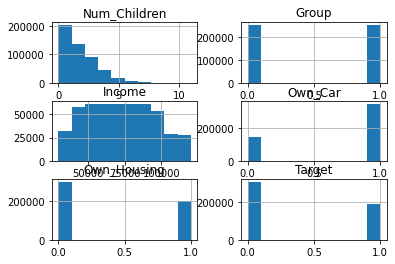

In [11]:
EDA_data.hist()

### Mearuring the correlation between attributes

<AxesSubplot:>

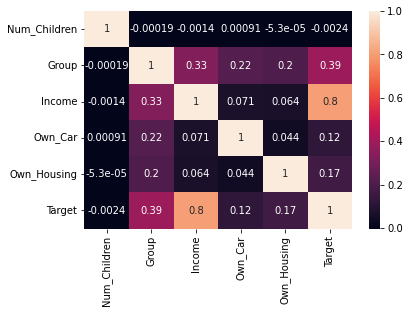

In [12]:
sns.heatmap(EDA_data.corr(), annot=True)

- The confusions matrix shows high correlation between Group, Income and Target attributes. 
- Let's create another CM between these attributes only for better representation

<AxesSubplot:>

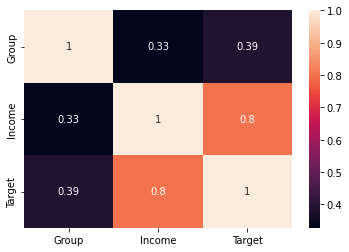

In [13]:
df_heatmap = EDA_data.drop(labels = ['Num_Children','Own_Car','Own_Housing'],axis = 1)
sns.heatmap(df_heatmap.corr(), annot=True)

In [14]:
Group_data = EDA_data.groupby('Group')['Group'].count()
Group_data

Group
0    249675
1    250325
Name: Group, dtype: int64

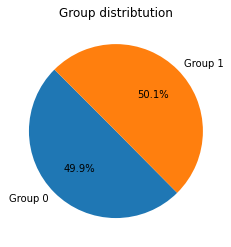

In [15]:
plt.pie(Group_data,
  labels=['Group 0', 'Group 1'],
  startangle=135,
  shadow= False,
  autopct='%1.1f%%')
 
plt.title('Group distribtution')
plt.show()

In [16]:
Group_Income = EDA_data.groupby('Group')['Income'].describe()

Group_Income

count          mean           std      min      25%      50%  \
Group                                                                    
0      249675.0  64978.389598  20210.170135  30000.0  47404.5  65021.0   
1      250325.0  80016.954064  23079.268452  40000.0  60045.0  80068.0   

           75%       max  
Group                     
0      82449.0   99999.0  
1      99974.0  119999.0

- We can see disparity between the average salaries, where group 1 has 23% higher average salay, as well as 20% higher Maximum salary

In [17]:
#obtaining the info of Group 0 against Target attribute
Group_0 = EDA_data[EDA_data['Group'] == 0]
Group_0=Group_0.groupby('Target')['Group'].count()
Group_0

Target
0    200286
1     49389
Name: Group, dtype: int64

- Group 0 has a rejection rate of 80% (200286 of the (group = 0) out of 249675 has target =  0)
- This gives us acceptance rate  = 20%

In [18]:
#obtaining the info of Group 1 against Target attribute
Group_1 = EDA_data[EDA_data['Group'] == 1]
Group_1=Group_1.groupby('Target')['Group'].count()
Group_1

Target
0    106401
1    143924
Name: Group, dtype: int64

- Group 0 has a rejection rate of 42.5% (106401 of the (group = 1) out of 250325 has target =  0)
- This gives us acceptance rate  = 57.5%

<AxesSubplot:xlabel='Group', ylabel='Income'>

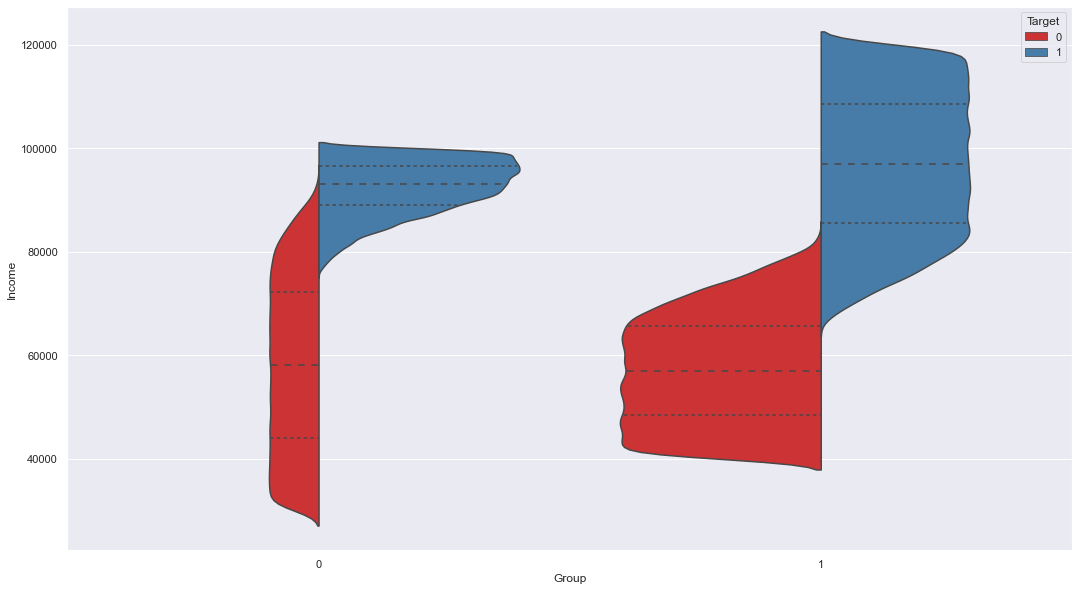

In [19]:
sns.set(rc={'figure.figsize':(18,10)})
sns.violinplot(data=EDA_data, x='Group', y = 'Income', hue = 'Target', palette = 'Set1', split = True, inner = 'quartile')

#### The graph and this EDA analysis already shows potential bias:
- Group 0 has general less average income than group 1.
- Group 0 rejection rate (of traget feature) is much more than group 1
- Some of Group 1 have acceptance at same income level of Group 0 while Group 0 has rejection. 

#### Now it is time to use fairdetect and AIF360 from IBM to further study bias in this dataset.

# 2. FairDetect extended DataFrame class with enhanced usability methods via SQLAlchemy, SQLite3 and sklearn

REFERENCE: Ryan Daher: Transparent Unfairness: An Approach to Investigating Machine Learning Bias


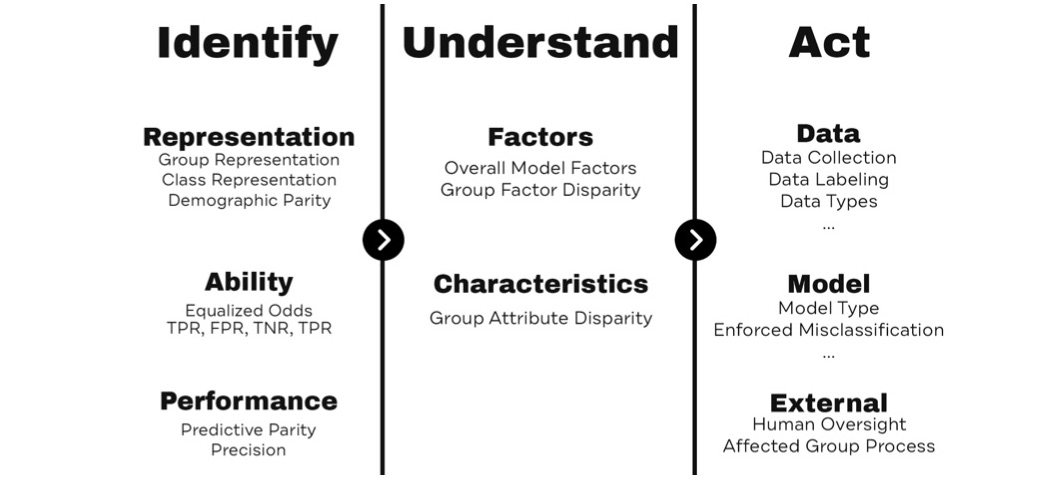

In [20]:
print("REFERENCE: Ryan Daher: Transparent Unfairness: An Approach to Investigating Machine Learning Bias")
Image(filename='ryan_bias.jpeg')

## STEP 1: Check documentation of imported library and class FairDetectE

In [21]:
# explore with help()
help(FairDetectE.from_file)

Help on method from_file in module fairdetect_group_e:

from_file(filename, target_var=None, ml_model_object=None, ml_prebuilt_model=None) method of builtins.type instance
    Converts the input file into a DataFrame and calls the class __init__ method with it.
    
    Parameters
    ----------
    filename : str
        Name of the input file, must be one of the following types: csv, xls, xlsx, xml or json.
    target_var : str, optional
        Name of the target variable. The default is None.
    ml_model_object : sklearn or xgboost, optional
        model object from sklearn or xgboost. The default is None.
    ml_prebuilt_model : str, optional
        Acronym of the ML algorithm that will be used to generate the prediction.
        Options: 'DTC', 'XGB', 'MLP', 'RFC', 'LOG'.The default is None.
    
    Raises
    ------
    TypeError
        When the method is called with arguments of the wrong type.
    Exception
        When the target_var is not present in the DataFrame.
    

## STEP 2: Import dataset

- In terms of usability of the code, we have created a @classmethod to initialize the fairdetect class in an convenient way, only setting the filename. 
- Additionally, by already setting target_var="Target" and ml_prebuilt_model = 'XGB' (or any of the prebuilt available models within the library - XGB, DTC, RFC, LOG, MLP-, the user conveniently can select already the critical variables to pass to its instance. With possibility of changing afterwards to experiment with other models or variables at any point.
- Alternatively, it could be done equivalently by passing a pandas dataframe when creating the instance, as well as the target_var and the model to be used (as object or a prebuilt available model).
- In all cases the instance created is an extended pandas Dataframe, keeping all the functionality of pandas while extending to fairdetect functions as well as sqlalchemy and sqlite database

In [22]:
data_credit = FairDetectE.from_file(filename = "synthetic_credit_card_approval.csv", 
                                      target_var = "Target", 
                                      ml_prebuilt_model = 'XGB')
print(type(data_credit))
print("Dimensions:", data_credit.shape)
data_credit.head(3)

<class 'fairdetect_group_e.FairDetectE'>
Dimensions: (500000, 6)


Num_Children  Group  Income  Own_Car  Own_Housing  Target
0             4      0   36151        0            0       0
1             0      0   36095        1            0       0
2             2      1   62110        1            1       0

## STEP 3: Preprocessing and splitting dataset

- We have prepared, apart from all the functionality of pandas, 3 functions to speed up and improve usability of our library.
- In this case we are using first "X_y_split", which generates internally the split in X and y based on the specified target_var earlier. Note that target_var can also be set here if it wasn't set earlier, or changed.
-  "split_data_totrain", to generate the train and test datasets for modelling. All of this is done internally, saved within our instance, so the model takes it automatically in next step.
- There is a third function that helps encode categorical labels, which in this specific case is not needed and therefore not used.

In [23]:
data_credit.X_y_split()

Succesfully splitted: showing first 3 rows...


Target
0       0
1       0
2       0

Num_Children  Group  Income  Own_Car  Own_Housing
0             4      0   36151        0            0
1             0      0   36095        1            0
2             2      1   62110        1            1

In [24]:
X_train, X_test, y_train, y_test  = data_credit.split_data_totrain()

Succesfully splitted: showing first 3 rows of Train...


Num_Children  Group  Income  Own_Car  Own_Housing
288363             1      1   40690        0            1
64982              2      0   75469        1            0
227641             1      1   70497        1            1

Target
288363       0
64982        0
227641       1

Succesfully splitted: showing first 3 rows of Test...


Num_Children  Group  Income  Own_Car  Own_Housing
194257             1      1   92093        1            1
396319             2      0   81071        1            0
138738             4      0   83536        0            0

Target
194257       1
396319       0
138738       0

## STEP 4: Training of ML model

- A method of the extended pandas dataframe has created to train both the standard models prebuilt in the library or any model object input by the user.
- By calling data_credit.train_model() the method fits the model to the training data and returns internally the model, and prints out the accuracy results for training and testing sets so that the user can evaluate if proceeding with this model or training a different one.
- data_credit.train_model() can take as argument the model to use, either because it was not specified or because we are experimenting and training several models. It can be 'LOG' (logistic regression), 'XGB' (xgboost), 'MLP' (artificial neural network), 'RFC' (random forest classifier), 'DTC' (decision tree classifier) as prebuilt model coming with default arguments or a model object can be passed with the argument "ml_model_object".
- Note that the last model trained is the last to be used with the identify_bias and understand_shap methods.
- As example, both user defined model object and several standard models are trained and a preliminary one is selected for further study based on accuracy.

In [25]:
# Example of result passing a specific non-default classifier, like no-penalty Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression
data_credit.train_model(ml_model_object=LogisticRegression(penalty='none'))

User input Model Object Selected
Training Classification Accuracy: 0.6681025
Testing Classification Accuracy: 0.66482
User input Model Succesfully fitted!


In [26]:
data_credit.train_model('DTC')

Decision TreeClassifier selected
Training Classification Accuracy: 0.9971525
Testing Classification Accuracy: 0.96322
Decision TreeClassifier Succesfully fitted!


In [27]:
data_credit.train_model('RFC')

Random Forest Classifier selected
Training Classification Accuracy: 0.9971325
Testing Classification Accuracy: 0.96372
Random Forest Classifier Model Succesfully fitted!


In [28]:
# MLP model can take lot of time to train depending on the computer, skipped here for this reason 
# data_credit.train_model('MLP')

In [29]:
data_credit.train_model('LOG')

Logistic Regression selected
Training Classification Accuracy: 0.6681025
Testing Classification Accuracy: 0.66482
Logistic Regression Model Succesfully fitted!


In [30]:
data_credit.train_model('XGB')

XGB selected
Training Classification Accuracy: 0.9742575
Testing Classification Accuracy: 0.97263
XGBoost Model Succesfully fitted!


- In this case, we first select XGB as our preliminary model based on the highest testing accuracy. However, later on the bias produced by different models will also be studied.
- This last model trained (XGB in this case) is the one that is used in further fairdetect analysis. Then it will be changed to obtain different insights with other models. 

## STEP 5: Let's save our results to a database and try reading them all back!

- Our object also has the capability to store in a persistent sqlite3 database the results that the user has been producing inside this object. It also stores the results from other instances of this class that uses this functionality.
- User just need to call method "store_results_in_db()" and all the results obtained till that point in the object are stored in "FairDetectDataBase.db", table "fairdetect_results". The way this is handled is by creating a temporary pandas dataframe that stores all results user obtains, and transfers into database whenever user uses the "store_results_in_db()". Upon finishing transfer, the temporary dataframe is reinitialized to an empty pandas dataframe to start collecting any new data.
- We will try this function now to save the training results and make them persistent.

In [31]:
data_credit.store_results_in_db()

Stored Succesfully:  10  results
Total of  10  records stored in database


- User can observe how many results have been stored persistently in database and how many total records.
- Also, a method has been created called "read_results_from_db" in order to check what is stored in database. Note that if no argument of sqlquery is provided to query the table of results within the database, the 10 most recent values generated are returned. This is very handy to compare the results all together.
- As can be observed, all the results from the models trained can be seen together. The best accuracy in testing is achieved by XGB.

In [32]:
data_credit.read_results_from_db()

filename target_var               analysis_date  \
0  synthetic_credit_card_approval.csv     Target  2022-07-31 22:36:30.444369   
1  synthetic_credit_card_approval.csv     Target  2022-07-31 22:36:30.268333   
2  synthetic_credit_card_approval.csv     Target  2022-07-31 22:36:21.364758   
3  synthetic_credit_card_approval.csv     Target  2022-07-31 22:36:21.324930   
4  synthetic_credit_card_approval.csv     Target  2022-07-31 22:36:19.473194   
5  synthetic_credit_card_approval.csv     Target  2022-07-31 22:36:15.811154   
6  synthetic_credit_card_approval.csv     Target  2022-07-31 22:35:42.742188   
7  synthetic_credit_card_approval.csv     Target  2022-07-31 22:35:42.681187   
8  synthetic_credit_card_approval.csv     Target  2022-07-31 22:35:42.073248   
9  synthetic_credit_card_approval.csv     Target  2022-07-31 22:35:42.033266   

        method                                           ml_model  \
0  train_model  XGBClassifier(base_score=None, booster=None, c...   
1  train_model  XGBClassifier(base_score=None, booster=None, c...   
2  train_model                               LogisticRegression()   
3  train_model                               LogisticRegression()   
4  train_model                           RandomForestClassifier()   
5  train_model                           RandomForestClassifier()   
6  train_model                           DecisionTreeClassifier()   
7  train_model                           DecisionTreeClassifier()   
8  train_model                 LogisticRegression(penalty='none')   
9  train_model                 LogisticRegression(penalty='none')   

              metric    result                          comments  
0   Testing Accuracy  0.972630        ML prebuilt model selected  
1  Training Accuracy  0.974257        ML prebuilt model selected  
2   Testing Accuracy  0.664820        ML prebuilt model selected  
3  Training Accuracy  0.668103        ML prebuilt model selected  
4   Testing Accuracy  0.963720        ML prebuilt model selected  
5  Training Accuracy  0.997132        ML prebuilt model selected  
6   Testing Accuracy  0.963220        ML prebuilt model selected  
7  Training Accuracy  0.997152        ML prebuilt model selected  
8   Testing Accuracy  0.664820  User input Model Object Selected  
9  Training Accuracy  0.668103  User input Model Object Selected

## 
## STEP 6: Now it's time to call "identify_bias" to study the bias in dataset with representation part and data and model with ability and predictive parts of the method.

- We just call "identify_bias" method over our newly created instance of extended pandas dataframe in order to generate the output. We study as sensitive group the variable "Group" and the generic labels for these are 0 for Group 0 and 1 for Group 1. This is the input to the identify_bias. Everything else is already generated and contained within the object "data_credit" in a convenient and user friendly way.
- Note that the last model trained is the one being used in next sections. It can be checked by calling it.

In [33]:
help(FairDetectE.identify_bias)

Help on function identify_bias in module fairdetect_group_e:

identify_bias(self, sensitive, labels)
    Performs the bias analysis of the datatset with respect to the sensitive 
    variable and its subgroups or labels and prints the results with the 
    following structure :
        REPRESENTATION
            Provides information regarding how the subgroups and response 
            labels are represented in the dataset and if the null hypothesis 
            is rejected for each of the chi squared tests.
            Uses the internal method representation.
        ABILITY
            Calculates the true positive rate, false positive rate, true 
            negative rate and false negative rate, performs the chi-squared 
            test of those rates and prints if the null hypothesis is rejected 
            depending on the p-values.
            Uses the internal methods ability, ability_plots and ability_metrics.
        PREDICTIVE
            calculates precision scores for eac

In [34]:
data_credit.model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [35]:
data_credit.identify_bias(sensitive = 'Group',labels = {0:'Group 0',1:'Group 1'})

REPRESENTATION


╒════╤═══════════╤═══════════╕
│    │   Group 0 │   Group 1 │
╞════╪═══════════╪═══════════╡
│  0 │  0.804943 │  0.423006 │
├────┼───────────┼───────────┤
│  1 │  0.195057 │  0.576994 │
╘════╧═══════════╧═══════════╛ 

*** Reject H0: Significant Relation Between Group and Target with p= 0.0


ABILITY


Accept H0: True Positive Disparity Not Detected. p= 0.7159221552842456
Accept H0: False Positive Disparity Not Detected. p= 0.588169391004731
Accept H0: True Negative Disparity Not Detected. p= 0.9319949919140254
Accept H0: False Negative Disparity Not Detected. p= 0.1040665041132579


PREDICTIVE


Accept H0: No Significant Predictive Disparity. p= 0.700437584401918


- Let's save our precious results in a persistent way!

In [36]:
data_credit.store_results_in_db()

Stored Succesfully:  10  results
Total of  20  records stored in database


In [37]:
data_credit.read_results_from_db()

filename target_var               analysis_date  \
0  synthetic_credit_card_approval.csv     Target  2022-07-31 22:36:31.151844   
1  synthetic_credit_card_approval.csv     Target  2022-07-31 22:36:31.119929   
2  synthetic_credit_card_approval.csv     Target  2022-07-31 22:36:31.115940   
3  synthetic_credit_card_approval.csv     Target  2022-07-31 22:36:31.112948   
4  synthetic_credit_card_approval.csv     Target  2022-07-31 22:36:31.109956   
5  synthetic_credit_card_approval.csv     Target  2022-07-31 22:36:31.106960   
6  synthetic_credit_card_approval.csv     Target  2022-07-31 22:36:31.102971   
7  synthetic_credit_card_approval.csv     Target  2022-07-31 22:36:31.099979   
8  synthetic_credit_card_approval.csv     Target  2022-07-31 22:36:31.095991   
9  synthetic_credit_card_approval.csv     Target  2022-07-31 22:36:30.992234   

          method                                           ml_model  \
0  identify_bias  XGBClassifier(base_score=None, booster=None, c...   
1  identify_bias  XGBClassifier(base_score=None, booster=None, c...   
2  identify_bias  XGBClassifier(base_score=None, booster=None, c...   
3  identify_bias  XGBClassifier(base_score=None, booster=None, c...   
4  identify_bias  XGBClassifier(base_score=None, booster=None, c...   
5  identify_bias  XGBClassifier(base_score=None, booster=None, c...   
6  identify_bias  XGBClassifier(base_score=None, booster=None, c...   
7  identify_bias  XGBClassifier(base_score=None, booster=None, c...   
8  identify_bias  XGBClassifier(base_score=None, booster=None, c...   
9  identify_bias  XGBClassifier(base_score=None, booster=None, c...   

                                     metric  \
0       p-value chi2 precision - Predictive   
1                             FNR - Ability   
2                             TNR - Ability   
3                             FPR - Ability   
4                             TPR - Ability   
5                Chi2 test on FNR - Ability   
6                Chi2 test on TNR - Ability   
7                Chi2 test on FPR - Ability   
8                Chi2 test on TPR - Ability   
9  p-value chi2 cont table - Representation   

                                              result  \
0                                           0.700438   
1  {'Group 0': 0.0728429260285216, 'Group 1': 0.0...   
2  {'Group 0': 0.9817268726847823, 'Group 1': 0.9...   
3  {'Group 0': 0.01827312731521766, 'Group 1': 0....   
4  {'Group 0': 0.9271570739714784, 'Group 1': 0.9...   
5                                           0.104067   
6                                           0.931995   
7                                           0.588169   
8                                           0.715922   
9                                                0.0   

                                            comments  
0  Accept H0: No Significant Predictive Disparity...  
1                 Confusion Matrix Metrics - Ability  
2                 Confusion Matrix Metrics - Ability  
3                 Confusion Matrix Metrics - Ability  
4                 Confusion Matrix Metrics - Ability  
5                                                     
6                                                     
7                                                     
8                                                     
9  *** Reject H0: Significant Relation Between Gr...

## 
## STEP 7: Identify_bias outcome discussion with XGB model

### Representation:
- Regarding Representation, which is independent of model, it can be very well observed how in spite of being represented group 0 and group 1 in a similar proportion in the dataset (around 50% each), the amount of outcome equal to 0 for Group 0 is significantly larger than the outcome equal to 0 in Group 1.
- Based on the p-value of the chi-squared test, it can be concluded that this difference is statistically significant, indicating that there is a significant relation between group and target.

### Ability:
- Regarding the ability disparities, we are evaluating already the dataset with the model predictions, so it is model dependent already.
- The TPR, TNR, FPR and FNR are presented. While the disparities regarding TPR, TNR and FPR are clearly not significant, with p-values larger than 0.5 in all cases, the FNR presents visually a larger difference within the groups 0 and 1, and a much lower p-value of 0.10, borderline to be considered significant.
- Note that the FNR represents the proportion of people that the model labels as 0 but the true label is 1.

### Predictive:
- In this case the statistical significance of the difference in precision scores for each group is compared. With this XGB model, no significant predictive disparity is detected.

### Overall Conclusion with XGB boost:
- In dataset itself Group 0 is not well represented and there is a significant relation with target, and in Ability although not strictly statistically significant, is very close to be significant the FNR.  

## STEP 8: Let's calculate identify_bias for the rest of the prebuilt models and compare the results

- We will make use of the functionality that the object oriented of this extended class provides to generate and store the results for several models in a very fast way. 
- Then with the built-in read database function we will orderly retrieve the desired data to compare.

In [38]:
# user input logistic regression
from sklearn.linear_model import LogisticRegression
data_credit.train_model(ml_model_object=LogisticRegression(penalty='none'))
data_credit.identify_bias(sensitive = 'Group',labels = {0:'Group 0',1:'Group 1'})
# prebuilt-logistic
data_credit.train_model('LOG')
data_credit.identify_bias(sensitive = 'Group',labels = {0:'Group 0',1:'Group 1'})
# prebuilt-logistic
data_credit.train_model('RFC')
data_credit.identify_bias(sensitive = 'Group',labels = {0:'Group 0',1:'Group 1'})
# prebuilt-logistic
data_credit.train_model('DTC')
data_credit.identify_bias(sensitive = 'Group',labels = {0:'Group 0',1:'Group 1'})

User input Model Object Selected
Training Classification Accuracy: 0.6681025
Testing Classification Accuracy: 0.66482
User input Model Succesfully fitted!
REPRESENTATION


╒════╤═══════════╤═══════════╕
│    │   Group 0 │   Group 1 │
╞════╪═══════════╪═══════════╡
│  0 │  0.804943 │  0.423006 │
├────┼───────────┼───────────┤
│  1 │  0.195057 │  0.576994 │
╘════╧═══════════╧═══════════╛ 

*** Reject H0: Significant Relation Between Group and Target with p= 0.0


ABILITY


Accept H0: True Positive Disparity Not Detected. p= 0.7640189182421995
Accept H0: False Positive Disparity Not Detected. p= 0.904888638786193
Accept H0: True Negative Disparity Not Detected. p= 0.929827490239829
Accept H0: False Negative Disparity Not Detected. p= 0.661381432976994


PREDICTIVE


*** Reject H0: Significant Predictive Disparity with p= 5.790664207750019e-05
Logistic Regression selected
Training Classification Accuracy: 0.6681025
Testing Classification Accuracy: 0.66482
Logistic Regression Model Succesfully fitted!
REPRESENTATION


╒════╤═══════════╤═══════════╕
│    │   Group 0 │   Group 1 │
╞════╪═══════════╪═══════════╡
│  0 │  0.804943 │  0.423006 │
├────┼───────────┼───────────┤
│  1 │  0.195057 │  0.576994 │
╘════╧═══════════╧═══════════╛ 

*** Reject H0: Significant Relation Between Group and Target with p= 0.0


ABILITY


Accept H0: True Positive Disparity Not Detected. p= 0.7640189182421995
Accept H0: False Positive Disparity Not Detected. p= 0.904888638786193
Accept H0: True Negative Disparity Not Detected. p= 0.929827490239829
Accept H0: False Negative Disparity Not Detected. p= 0.661381432976994


PREDICTIVE


*** Reject H0: Significant Predictive Disparity with p= 5.790664207750019e-05
Random Forest Classifier selected
Training Classification Accuracy: 0.9971375
Testing Classification Accuracy: 0.96368
Random Forest Classifier Model Succesfully fitted!
REPRESENTATION


╒════╤═══════════╤═══════════╕
│    │   Group 0 │   Group 1 │
╞════╪═══════════╪═══════════╡
│  0 │  0.804943 │  0.423006 │
├────┼───────────┼───────────┤
│  1 │  0.195057 │  0.576994 │
╘════╧═══════════╧═══════════╛ 

*** Reject H0: Significant Relation Between Group and Target with p= 0.0


ABILITY


Accept H0: True Positive Disparity Not Detected. p= 0.6252682533107485
Accept H0: False Positive Disparity Not Detected. p= 0.5172585982725171
Accept H0: True Negative Disparity Not Detected. p= 0.9056163566526924
*  Reject H0: Significant False Negative Disparity with p= 0.059877214320829895


PREDICTIVE


Accept H0: No Significant Predictive Disparity. p= 0.610448461825224
Decision TreeClassifier selected
Training Classification Accuracy: 0.9971525
Testing Classification Accuracy: 0.96313
Decision TreeClassifier Succesfully fitted!
REPRESENTATION


╒════╤═══════════╤═══════════╕
│    │   Group 0 │   Group 1 │
╞════╪═══════════╪═══════════╡
│  0 │  0.804943 │  0.423006 │
├────┼───────────┼───────────┤
│  1 │  0.195057 │  0.576994 │
╘════╧═══════════╧═══════════╛ 

*** Reject H0: Significant Relation Between Group and Target with p= 0.0


ABILITY


Accept H0: True Positive Disparity Not Detected. p= 0.5982600269402778
Accept H0: False Positive Disparity Not Detected. p= 0.512100340893798
Accept H0: True Negative Disparity Not Detected. p= 0.9059341164003191
** Reject H0: Significant False Negative Disparity with p= 0.04987583100076255


PREDICTIVE


Accept H0: No Significant Predictive Disparity. p= 0.6220957800811946


In [39]:
data_credit.store_results_in_db()

Stored Succesfully:  48  results
Total of  68  records stored in database


- Lets compare the ability of all the cases for the False Negative Rate that was of most interest based on the previous result.
- It can be observed that except for LogisticRegression cases, for DecisionTree and RandomForest, the FNR is significantly different within Group 0 and Group 1!!

In [40]:
data_credit.read_results_from_db("SELECT * FROM fairdetect_results WHERE method ='identify_bias' \
                                 AND metric ='Chi2 test on FNR - Ability' ")[0:5]

filename target_var               analysis_date  \
0  synthetic_credit_card_approval.csv     Target  2022-07-31 22:36:31.106960   
1  synthetic_credit_card_approval.csv     Target  2022-07-31 22:37:13.565380   
2  synthetic_credit_card_approval.csv     Target  2022-07-31 22:37:12.644856   
3  synthetic_credit_card_approval.csv     Target  2022-07-31 22:36:34.587022   
4  synthetic_credit_card_approval.csv     Target  2022-07-31 22:36:32.474418   

          method                                           ml_model  \
0  identify_bias  XGBClassifier(base_score=None, booster=None, c...   
1  identify_bias                           DecisionTreeClassifier()   
2  identify_bias                           RandomForestClassifier()   
3  identify_bias                               LogisticRegression()   
4  identify_bias                 LogisticRegression(penalty='none')   

                       metric    result comments  
0  Chi2 test on FNR - Ability  0.104067           
1  Chi2 test on FNR - Ability  0.049876           
2  Chi2 test on FNR - Ability  0.059877           
3  Chi2 test on FNR - Ability  0.661381           
4  Chi2 test on FNR - Ability  0.661381

- Now let's look at the disparity of the predictive nature of the model below. In the same way, conveniently can be called the persistent database to have all the data compared together.
- It is clear in this point that Logistic Regression presents a very significant predictive disparity, while XGB, DTC or RFC does not.
- As conclusion, although database presents representation biases, the only model that does not worsen that is XGboost since does not present significant disparity on the predictive nature nor in the ability (although very close to be significant).
- This is the model to be used in next section, understand_shap

In [41]:
data_credit.read_results_from_db("SELECT * FROM fairdetect_results WHERE method ='identify_bias' \
                                 AND metric ='p-value chi2 precision - Predictive' ")[0:5]

filename target_var               analysis_date  \
0  synthetic_credit_card_approval.csv     Target  2022-07-31 22:36:31.151844   
1  synthetic_credit_card_approval.csv     Target  2022-07-31 22:37:13.617219   
2  synthetic_credit_card_approval.csv     Target  2022-07-31 22:37:12.701705   
3  synthetic_credit_card_approval.csv     Target  2022-07-31 22:36:34.689784   
4  synthetic_credit_card_approval.csv     Target  2022-07-31 22:36:32.521758   

          method                                           ml_model  \
0  identify_bias  XGBClassifier(base_score=None, booster=None, c...   
1  identify_bias                           DecisionTreeClassifier()   
2  identify_bias                           RandomForestClassifier()   
3  identify_bias                               LogisticRegression()   
4  identify_bias                 LogisticRegression(penalty='none')   

                                metric    result  \
0  p-value chi2 precision - Predictive  0.700438   
1  p-value chi2 precision - Predictive  0.622096   
2  p-value chi2 precision - Predictive  0.610448   
3  p-value chi2 precision - Predictive  0.000058   
4  p-value chi2 precision - Predictive  0.000058   

                                            comments  
0  Accept H0: No Significant Predictive Disparity...  
1  Accept H0: No Significant Predictive Disparity...  
2  Accept H0: No Significant Predictive Disparity...  
3  *** Reject H0: Significant Predictive Disparit...  
4  *** Reject H0: Significant Predictive Disparit...

## STEP 9: Now we make use of understand_shap method embedded into our extended dataframe class

- Now we are ready to run understand_shap method on XGB model. 
- We have selected affected_group = 0, and affected target = 0. This represents the subgroup within the sensitive that is more prone to an outcome equal to 0. As affected_target it is chosen 0, which represents those that have a true label of 1, but have been missclassified as 0.

XGB selected
Training Classification Accuracy: 0.9742575
Testing Classification Accuracy: 0.97263
XGBoost Model Succesfully fitted!
Model Importance Comparison


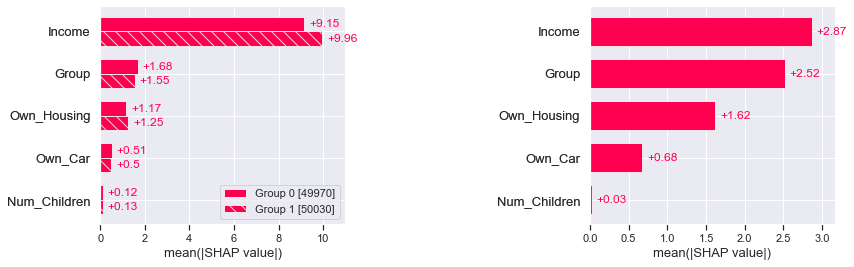

Affected Attribute Comparison
Average Comparison to True Class Members


Average Comparison to All Members


Random Affected Decision Process


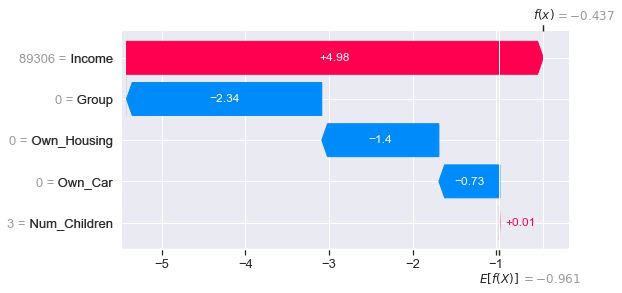

In [42]:
data_credit.train_model('XGB')
data_credit.understand_shap(labels = {0:'Group 0',1:'Group 1'},sensitive = 'Group', affected_group = 0, affected_target = 0)

### Comments
- It can be observed that the income is by far the most important variable in general for the target variable, being group the second one.
- The upper right bar plot shows what affects more the affected class in particular. It is worth noting that in this case both Group and Income come as the largest and close to each other contributors, therefore showing the specific bias and importance of variable Group within this class.
- This can be reinforced looking at the third plot, "Average Comparison to True Class Members". In this case, even though Income and Own Housing are even larger than in the category of true class members, which could benefit them, it is overcomed by belonging to Group 0. This shows how model is biased in this direction for this affected class.
- The last plot of Random Affected Decision Process is a random plot from a datapoint, so every time the method is ran a different point and function is obtained as a random sample. But typically, in most occasions, the Group = 0 will present a negative contribution to the overall decision, another indicator of the bias present.

## STEP 10: A final note on fast and flexible usability of the class

- Here we show in a nutshell how to in just 7 lines of code be able to ran completely this class, from data ingestion from a csv to producing output of both identify_bias and understand_shap and storing persistently in a sqlite database, and read back them.

    - example2 = FairDetectE.from_file(filename = "synthetic_credit_card_approval.csv", target_var = "Target",ml_model_object = LogisticRegression(penalty='elasticnet',solver='saga'))
    - example2.X_y_split()
    - example2.data_credit.split_data_totrain()
    - example2.train_model()
    - example2.identify_bias(sensitive = 'Group',labels = {0:'Group 0',1:'Group 1'})
    - example2.understand_shap(labels = {0:'Group 0',1:'Group 1'},sensitive = 'Group', affected_group = 0, affected_target = 0)
    - example2.store_results_in_db()

In [43]:
example2 = FairDetectE.from_file(filename = "synthetic_credit_card_approval.csv", target_var = "Target",ml_model_object = LogisticRegression(C=100))
example2.X_y_split()
example2.split_data_totrain()
example2.train_model()
example2.identify_bias(sensitive = 'Group',labels = {0:'Group 0',1:'Group 1'})
example2.store_results_in_db()

Succesfully splitted: showing first 3 rows...


Target
0       0
1       0
2       0

Num_Children  Group  Income  Own_Car  Own_Housing
0             4      0   36151        0            0
1             0      0   36095        1            0
2             2      1   62110        1            1

Succesfully splitted: showing first 3 rows of Train...


Num_Children  Group  Income  Own_Car  Own_Housing
288363             1      1   40690        0            1
64982              2      0   75469        1            0
227641             1      1   70497        1            1

Target
288363       0
64982        0
227641       1

Succesfully splitted: showing first 3 rows of Test...


Num_Children  Group  Income  Own_Car  Own_Housing
194257             1      1   92093        1            1
396319             2      0   81071        1            0
138738             4      0   83536        0            0

Target
194257       1
396319       0
138738       0

User input Model Object Selected
Training Classification Accuracy: 0.6681025
Testing Classification Accuracy: 0.66482
User input Model Succesfully fitted!
REPRESENTATION


╒════╤═══════════╤═══════════╕
│    │   Group 0 │   Group 1 │
╞════╪═══════════╪═══════════╡
│  0 │  0.804943 │  0.423006 │
├────┼───────────┼───────────┤
│  1 │  0.195057 │  0.576994 │
╘════╧═══════════╧═══════════╛ 

*** Reject H0: Significant Relation Between Group and Target with p= 0.0


ABILITY


Accept H0: True Positive Disparity Not Detected. p= 0.7640189182421995
Accept H0: False Positive Disparity Not Detected. p= 0.904888638786193
Accept H0: True Negative Disparity Not Detected. p= 0.929827490239829
Accept H0: False Negative Disparity Not Detected. p= 0.661381432976994


PREDICTIVE


*** Reject H0: Significant Predictive Disparity with p= 5.790664207750019e-05
Stored Succesfully:  12  results
Total of  80  records stored in database


- And with a SQL query to the database, where we have made the data persistent, we can see at a glance, all the data generated with this model and study.

In [44]:
example2.read_results_from_db("""SELECT * FROM fairdetect_results WHERE ml_model ="LogisticRegression(C=100)" """)

filename target_var               analysis_date  \
0   synthetic_credit_card_approval.csv     Target  2022-07-31 22:37:29.668228   
1   synthetic_credit_card_approval.csv     Target  2022-07-31 22:37:29.626339   
2   synthetic_credit_card_approval.csv     Target  2022-07-31 22:37:29.623348   
3   synthetic_credit_card_approval.csv     Target  2022-07-31 22:37:29.619358   
4   synthetic_credit_card_approval.csv     Target  2022-07-31 22:37:29.616365   
5   synthetic_credit_card_approval.csv     Target  2022-07-31 22:37:29.613372   
6   synthetic_credit_card_approval.csv     Target  2022-07-31 22:37:29.610390   
7   synthetic_credit_card_approval.csv     Target  2022-07-31 22:37:29.607389   
8   synthetic_credit_card_approval.csv     Target  2022-07-31 22:37:29.604397   
9   synthetic_credit_card_approval.csv     Target  2022-07-31 22:37:29.504663   
10  synthetic_credit_card_approval.csv     Target  2022-07-31 22:37:29.364041   
11  synthetic_credit_card_approval.csv     Target  2022-07-31 22:37:29.324146   

           method                   ml_model  \
0   identify_bias  LogisticRegression(C=100)   
1   identify_bias  LogisticRegression(C=100)   
2   identify_bias  LogisticRegression(C=100)   
3   identify_bias  LogisticRegression(C=100)   
4   identify_bias  LogisticRegression(C=100)   
5   identify_bias  LogisticRegression(C=100)   
6   identify_bias  LogisticRegression(C=100)   
7   identify_bias  LogisticRegression(C=100)   
8   identify_bias  LogisticRegression(C=100)   
9   identify_bias  LogisticRegression(C=100)   
10    train_model  LogisticRegression(C=100)   
11    train_model  LogisticRegression(C=100)   

                                      metric  \
0        p-value chi2 precision - Predictive   
1                              FNR - Ability   
2                              TNR - Ability   
3                              FPR - Ability   
4                              TPR - Ability   
5                 Chi2 test on FNR - Ability   
6                 Chi2 test on TNR - Ability   
7                 Chi2 test on FPR - Ability   
8                 Chi2 test on TPR - Ability   
9   p-value chi2 cont table - Representation   
10                          Testing Accuracy   
11                         Training Accuracy   

                                               result  \
0                                            0.000058   
1   {'Group 0': 0.33712937314045344, 'Group 1': 0....   
2   {'Group 0': 0.6530343335902344, 'Group 1': 0.6...   
3   {'Group 0': 0.34696566640976556, 'Group 1': 0....   
4   {'Group 0': 0.6628706268595466, 'Group 1': 0.6...   
5                                            0.661381   
6                                            0.929827   
7                                            0.904889   
8                                            0.764019   
9                                                 0.0   
10                                            0.66482   
11                                           0.668103   

                                             comments  
0   *** Reject H0: Significant Predictive Disparit...  
1                  Confusion Matrix Metrics - Ability  
2                  Confusion Matrix Metrics - Ability  
3                  Confusion Matrix Metrics - Ability  
4                  Confusion Matrix Metrics - Ability  
5                                                      
6                                                      
7                                                      
8                                                      
9   *** Reject H0: Significant Relation Between Gr...  
10                   User input Model Object Selected  
11                   User input Model Object Selected

## STEP 11: What if the user tries again to calculate identify_bias for this same conditions?

- The class presents a feature that compares what the user asks regarding main 2 functions of identify_bias and understanding_shap against the persistent SQLite3 database. If similar data already exists, a prompt asks the user if wants to proceed or cancel the request. Let's see how this works!
- We are going to request to calculate identify_bias with the same conditions as before, and once we saved persistently in database the previous results.
- Note that equivalent results are found in the database already! Make sure you enter "N" in the prompt to continue!

In [45]:
example2.identify_bias(sensitive = 'Group',labels = {0:'Group 0',1:'Group 1'})

Found in persistent database equivalent  10  results
Criteria: same filename, same target_var, same method, same ml model
Showing first 20 results in SQLite database with this criteria


filename target_var               analysis_date  \
0  synthetic_credit_card_approval.csv     Target  2022-07-31 22:37:29.668228   
1  synthetic_credit_card_approval.csv     Target  2022-07-31 22:37:29.626339   
2  synthetic_credit_card_approval.csv     Target  2022-07-31 22:37:29.623348   
3  synthetic_credit_card_approval.csv     Target  2022-07-31 22:37:29.619358   
4  synthetic_credit_card_approval.csv     Target  2022-07-31 22:37:29.616365   
5  synthetic_credit_card_approval.csv     Target  2022-07-31 22:37:29.613372   
6  synthetic_credit_card_approval.csv     Target  2022-07-31 22:37:29.610390   
7  synthetic_credit_card_approval.csv     Target  2022-07-31 22:37:29.607389   
8  synthetic_credit_card_approval.csv     Target  2022-07-31 22:37:29.604397   
9  synthetic_credit_card_approval.csv     Target  2022-07-31 22:37:29.504663   

          method                   ml_model  \
0  identify_bias  LogisticRegression(C=100)   
1  identify_bias  LogisticRegression(C=100)   
2  identify_bias  LogisticRegression(C=100)   
3  identify_bias  LogisticRegression(C=100)   
4  identify_bias  LogisticRegression(C=100)   
5  identify_bias  LogisticRegression(C=100)   
6  identify_bias  LogisticRegression(C=100)   
7  identify_bias  LogisticRegression(C=100)   
8  identify_bias  LogisticRegression(C=100)   
9  identify_bias  LogisticRegression(C=100)   

                                     metric  \
0       p-value chi2 precision - Predictive   
1                             FNR - Ability   
2                             TNR - Ability   
3                             FPR - Ability   
4                             TPR - Ability   
5                Chi2 test on FNR - Ability   
6                Chi2 test on TNR - Ability   
7                Chi2 test on FPR - Ability   
8                Chi2 test on TPR - Ability   
9  p-value chi2 cont table - Representation   

                                              result  \
0                                           0.000058   
1  {'Group 0': 0.33712937314045344, 'Group 1': 0....   
2  {'Group 0': 0.6530343335902344, 'Group 1': 0.6...   
3  {'Group 0': 0.34696566640976556, 'Group 1': 0....   
4  {'Group 0': 0.6628706268595466, 'Group 1': 0.6...   
5                                           0.661381   
6                                           0.929827   
7                                           0.904889   
8                                           0.764019   
9                                                0.0   

                                            comments  
0  *** Reject H0: Significant Predictive Disparit...  
1                 Confusion Matrix Metrics - Ability  
2                 Confusion Matrix Metrics - Ability  
3                 Confusion Matrix Metrics - Ability  
4                 Confusion Matrix Metrics - Ability  
5                                                     
6                                                     
7                                                     
8                                                     
9  *** Reject H0: Significant Relation Between Gr...

Please press 'N' to stop method calculation, any other key to continue:N
Calculation of method stopped by user. Data can be retrieved from database using 'read_results_from_db' method 


# AI360 IBM FAIRNESS

## Description


AIF360 is an extensible, open source toolkit for measuring, understanding, and reducing AI bias. It combines the top bias metrics, bias mitigation algorithms, and metric explainers from fairness researchers across industry and academia. The goals of the AIF360 toolkit are as follows:

AIF360 currently includes Python packages that implement techniques from eight published papers across the greater AI fairness research community. There are currently 77 bias detection metrics and 10 bias mitigation algorithms that can be called in a standard way similar to scikit-learn’s fit/transform/predict paradigm. The toolkit is open source and contains documentation, demonstrations, and other artifacts.
(Source : https://www.oreilly.com/library/view/ai-fairness/9781492077664/ch01.html)


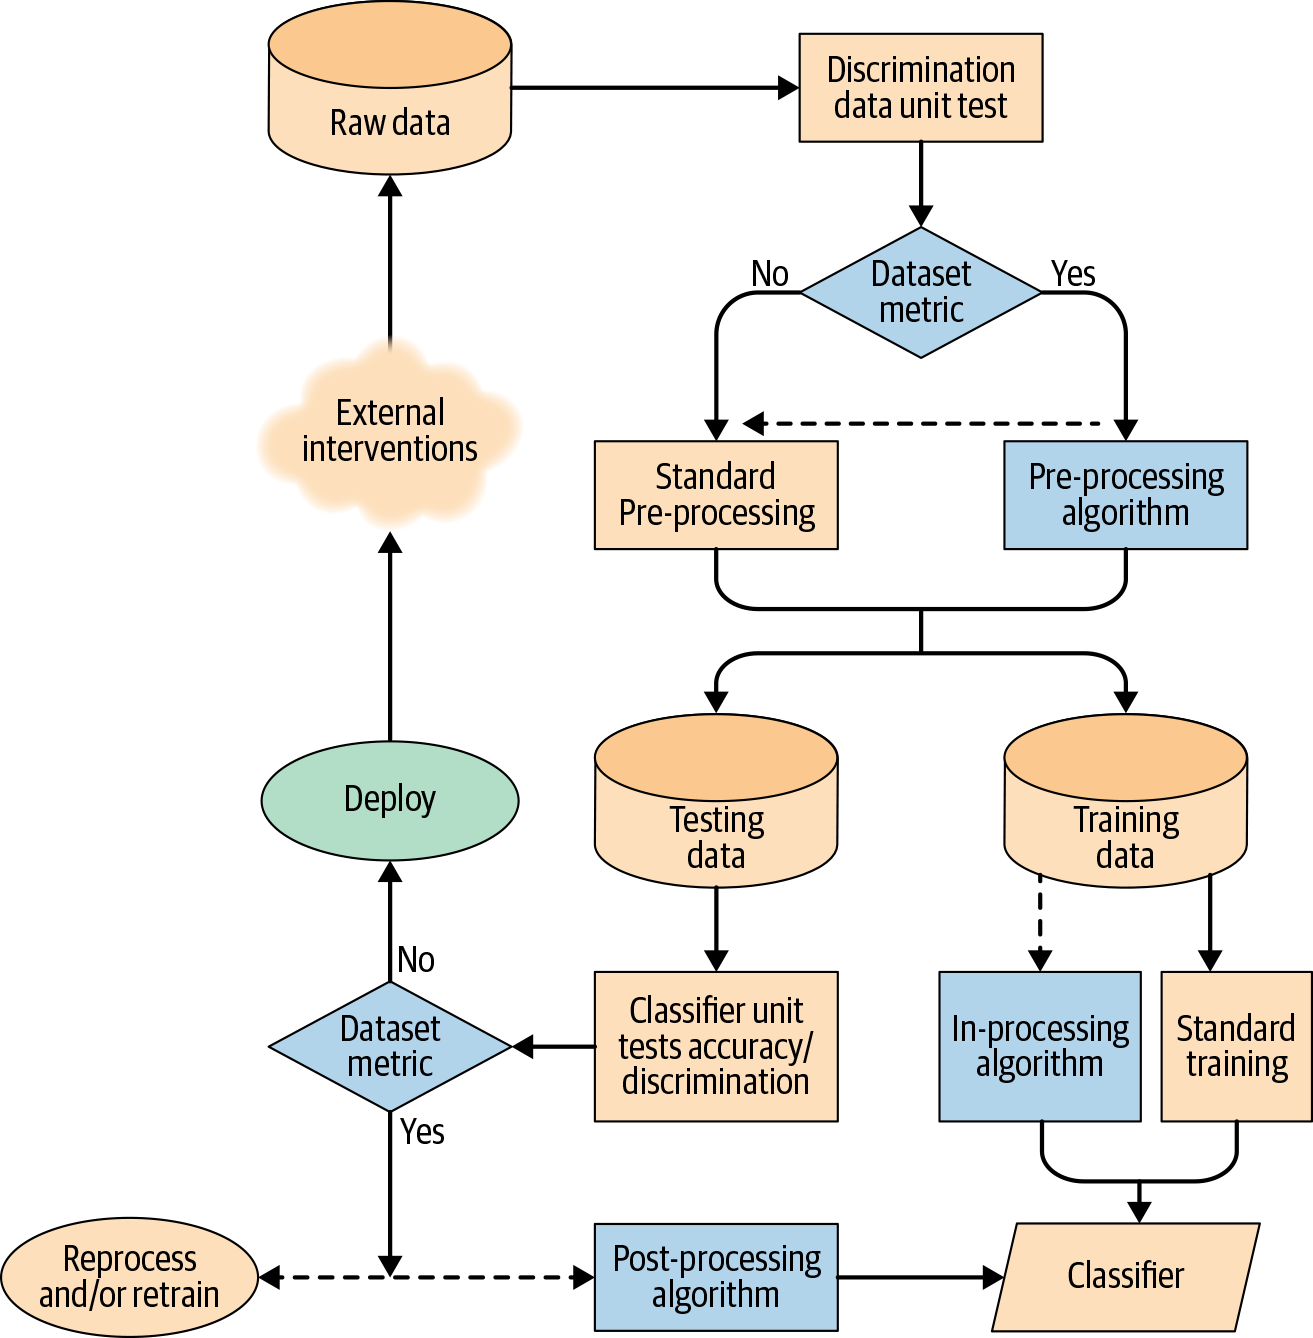

In [46]:
Image(filename='aif360summary.png')

# Group Analysis Approach:

First round of analysis we worked with the Dataset metric on the original dataset analysis, 
This gave us intial insights on the original dataset same in Ryan's Fairdetect Identify
Stage through represerntation. Next, we decided to use ClassificationMetric to give more insigths on  the original Datsset i.e teh test Dataset and predicted dataset so we can check for different Metrices for anylazing the classified data. This is equivalent to Ryan's Ability . 

We considered two clases in the comparsion:

DatasetMetric class (and in its child classes, such as BinaryLabelDatasetMetric): A class for computing metrics based on a single binary label dataset

ClassificationMetric : A class for computing metrics based on a two binary label dataset ( i.e Test dataset and the predicted dataset  w.r.t this notebook analysis. 

(Source: https://www.oreilly.com/library/view/ai-fairness/9781492077664/ch01.html)

## Step 1: Import Library and Methods to use¶

### Pre Package Installation Considerations & Observations :

1. A bug in AIF360 package has been found: Once installed, upon import it shows an error if tensorflow is not installed. However, by trying a second time the need to install a heavy library such as tensorflow which we dont use is avoid with the below try-except

2. Depending on the which version is running the  older versions of package will have the mdss_detector.py which runs the Scoring Functions such as Bernoulli,BerkJones,Gaussian,ScoringFunction &Poisson. Nevertheless , since this Class is  not existent in earlier package we decided not to consider it as one of the chosen metrices 


In [47]:
# install the aif360 if needed 
!pip install aif360
#Importing the packages and method in Try except
try:
    
    import pandas as pd
    import numpy as np
    import aif360
    from aif360.datasets import StructuredDataset, BinaryLabelDataset
    from aif360.metrics import Metric, utils
    from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
    from IPython.display import Markdown, display
    from aif360.metrics import ClassificationMetric
except:
    import numpy as np
    import aif360
    from aif360.datasets import StructuredDataset, BinaryLabelDataset
    from aif360.metrics import Metric, utils
    from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
    from IPython.display import Markdown, display

pip install 'aif360[AdversarialDebiasing]'


## Step 2: Dataset Preparation Considerations :

1.  In this case we use the same dataset and import the same train and test split, as well as the model(s) used above in fairdetect in order to make an exact comparison of the outputs. Note that we continue using directly the instance of the extended pd.DataFrame class created above, which provides us with great flexibility to call the methods directly and create the dataframes needed.

2. The dataframes prepared to be ready to be analyzed as needed afterwards are:
   a) Full dataset with original response (orig_all_data)
   b) Training set with original response (orig_train_data)
   c) Training set with model prediction response (pred_train_data)
   d) Test set with original response (orig_test_data)
   e) Test set with model prediction response (pred_test_data)
  
3. The metrices in AI360 expects dataset of type(BinaryLabelDataset) so before the intialization of the class object we enure the conversion of the Dataset in scope to this type to avoid Type Error . 

4. Ryan's fairdetect uses the test dataset,Later we ran both packages for comparison using test data being the original and got the same results . Nevertheless, we opted for additional step to run the AI360 with original dataset as well and reflect on the results 

In [48]:
# original all data
orig_all_data = data_credit.copy()
print("Orig_All_Data")
print(orig_all_data.head(3))
print("****************************************************************")


# original train data
orig_train_data = X_train.join(y_train)
print("Orig_Train_Data")
print(orig_train_data.head(3))
print("****************************************************************")

# original test data
orig_test_data = X_test.join(y_test)
print("Orig_Test_Data")
print(orig_test_data.head(3))
print("****************************************************************")

# predicted train data (Predictions used based on the fairdetect model fit option so that output can be compared correctl.
y_train_pred = data_credit.model.predict(X_train)
y_train_pred = pd.DataFrame(y_train_pred).set_index(orig_train_data.index)
y_train_pred = y_train_pred.rename(columns={0: "Target"})
pred_train_data = X_train.join(y_train_pred)
print("Pred_Train_Data")
print(pred_train_data.head(3))
print("****************************************************************")

# predicted test data (Predictions used from fairdetect model fit option so that output can be compared correctly.)
y_test_pred = data_credit.model.predict(X_test)
y_test_pred = pd.DataFrame(y_test_pred).set_index(orig_test_data.index)
y_test_pred = y_test_pred.rename(columns={0: "Target"})
pred_test_data = X_test.join(y_test_pred)
print("pred_test_data")
print(pred_test_data.head(3))
print("****************************************************************")

Orig_All_Data
   Num_Children  Group  Income  Own_Car  Own_Housing  Target
0             4      0   36151        0            0       0
1             0      0   36095        1            0       0
2             2      1   62110        1            1       0
****************************************************************
Orig_Train_Data
        Num_Children  Group  Income  Own_Car  Own_Housing  Target
288363             1      1   40690        0            1       0
64982              2      0   75469        1            0       0
227641             1      1   70497        1            1       1
****************************************************************
Orig_Test_Data
        Num_Children  Group  Income  Own_Car  Own_Housing  Target
194257             1      1   92093        1            1       1
396319             2      0   81071        1            0       0
138738             4      0   83536        0            0       0
*****************************************************

# Step 3: Dataset Analysis using  AI360 Bias Classes and Methods 


- Observations and Considerations:

1. In this step we analyze the dataset itself, not the fitted model yet. This is equivalent as "Representation" in fairdetect.

2. Since our datatype is a binary label dataset, first we create a BinaryLabelDataset class indicating the favorable label=1, unfavorable label=0, the dataframe to study (our dataset), the response variable = Target, and the protected attribute name = Group

3. After creating the BinaryLabelDataset instance, we specify privileged and unprivileged groups and create an instance of BinaryLabelDatasetMetric class. This class contains several useful functions to study any potential bias existing in our dataset.

4. Dataset Definition Assumptions :

   (a) Target = 0 Bad Credit Risk, Target = 1 Good Credit Risk

   (b) Sensitive(Protected) Attribute Assumptions 
       Group 0, Target avg = 0.197, 
       Group 1 Target avg = 0.575
   (c) If 1 is good, Privileged Group = Group 1
       If 1 is good, Unprivileged Group = Group 0

In [49]:
# converting the dataset into Binarylabeldataset to avoid Type Error when  creating the objects 

df_bldataset= aif360.datasets.BinaryLabelDataset(favorable_label = 1,
                                           unfavorable_label = 0,
                                           df = orig_test_data,
                                           label_names = ['Target'], 
                                           protected_attribute_names = ['Group'])

#checking the successful datset conversion
print(" Successfully conversion of dataset to the : ",type(df_bldataset))

 Successfully conversion of dataset to the :  <class 'aif360.datasets.binary_label_dataset.BinaryLabelDataset'>


In [50]:
# Setting the variables for the unpriviliged and privilged adn initalization of the BinaryLabelDatasetMetric object 
u = [{'Group': 0}]
p = [{'Group': 1}]
df_blmetrics = aif360.metrics.BinaryLabelDatasetMetric(df_bldataset,
                                                       unprivileged_groups=u,
                                                       privileged_groups=p)


print("Object Created of type :  ",type(df_blmetrics))


Object Created of type :   <class 'aif360.metrics.binary_label_dataset_metric.BinaryLabelDatasetMetric'>


- let us check the Help to explore the class methods:

In [51]:
# Calling the help Function to start exploring the functions of the BinaryLabelDatasetMetric class 
help(df_blmetrics)

Help on BinaryLabelDatasetMetric in module aif360.metrics.binary_label_dataset_metric object:

class BinaryLabelDatasetMetric(aif360.metrics.dataset_metric.DatasetMetric)
 |  BinaryLabelDatasetMetric(dataset, unprivileged_groups=None, privileged_groups=None)
 |  
 |  Class for computing metrics based on a single
 |  :obj:`~aif360.datasets.BinaryLabelDataset`.
 |  
 |  Method resolution order:
 |      BinaryLabelDatasetMetric
 |      aif360.metrics.dataset_metric.DatasetMetric
 |      aif360.metrics.metric.Metric
 |      abc.ApplyDecorator
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, dataset, unprivileged_groups=None, privileged_groups=None)
 |      Args:
 |          dataset (BinaryLabelDataset): A BinaryLabelDataset.
 |          privileged_groups (list(dict)): Privileged groups. Format is a list
 |              of `dicts` where the keys are `protected_attribute_names` and
 |              the values are values in `protected_attributes`. Each `dict`
 |  

# Step 4: BinaryLabelDatasetMetric Methods Exploration 

- With BinaryLabelDatasetMetric we explore the methods regarding the dataset itself. It is similar to the "Representation" part of Ryan. Therefore, we focus on studying the biases existing in our dataset. This is therefore model independent, and no predictions are taken into account yet.
- Note that for equal comparison, we study the test dataset as in Ryan's representation functions.

### Disparity Impact:

(Source: https://towardsdatascience.com/ai-fairness-explanation-of-disparate-impact-remover-ce0da59451f1)

- Disparity Impact of 0.338057 which is below that .80  is indicator of biases in the dataset 
- Ryan's representation results showed the same biases tendecny with 80% of Group 0 being with bad Score (Target 0). Also the p-test chi2 showed a statistical significant relation between Group and Target.

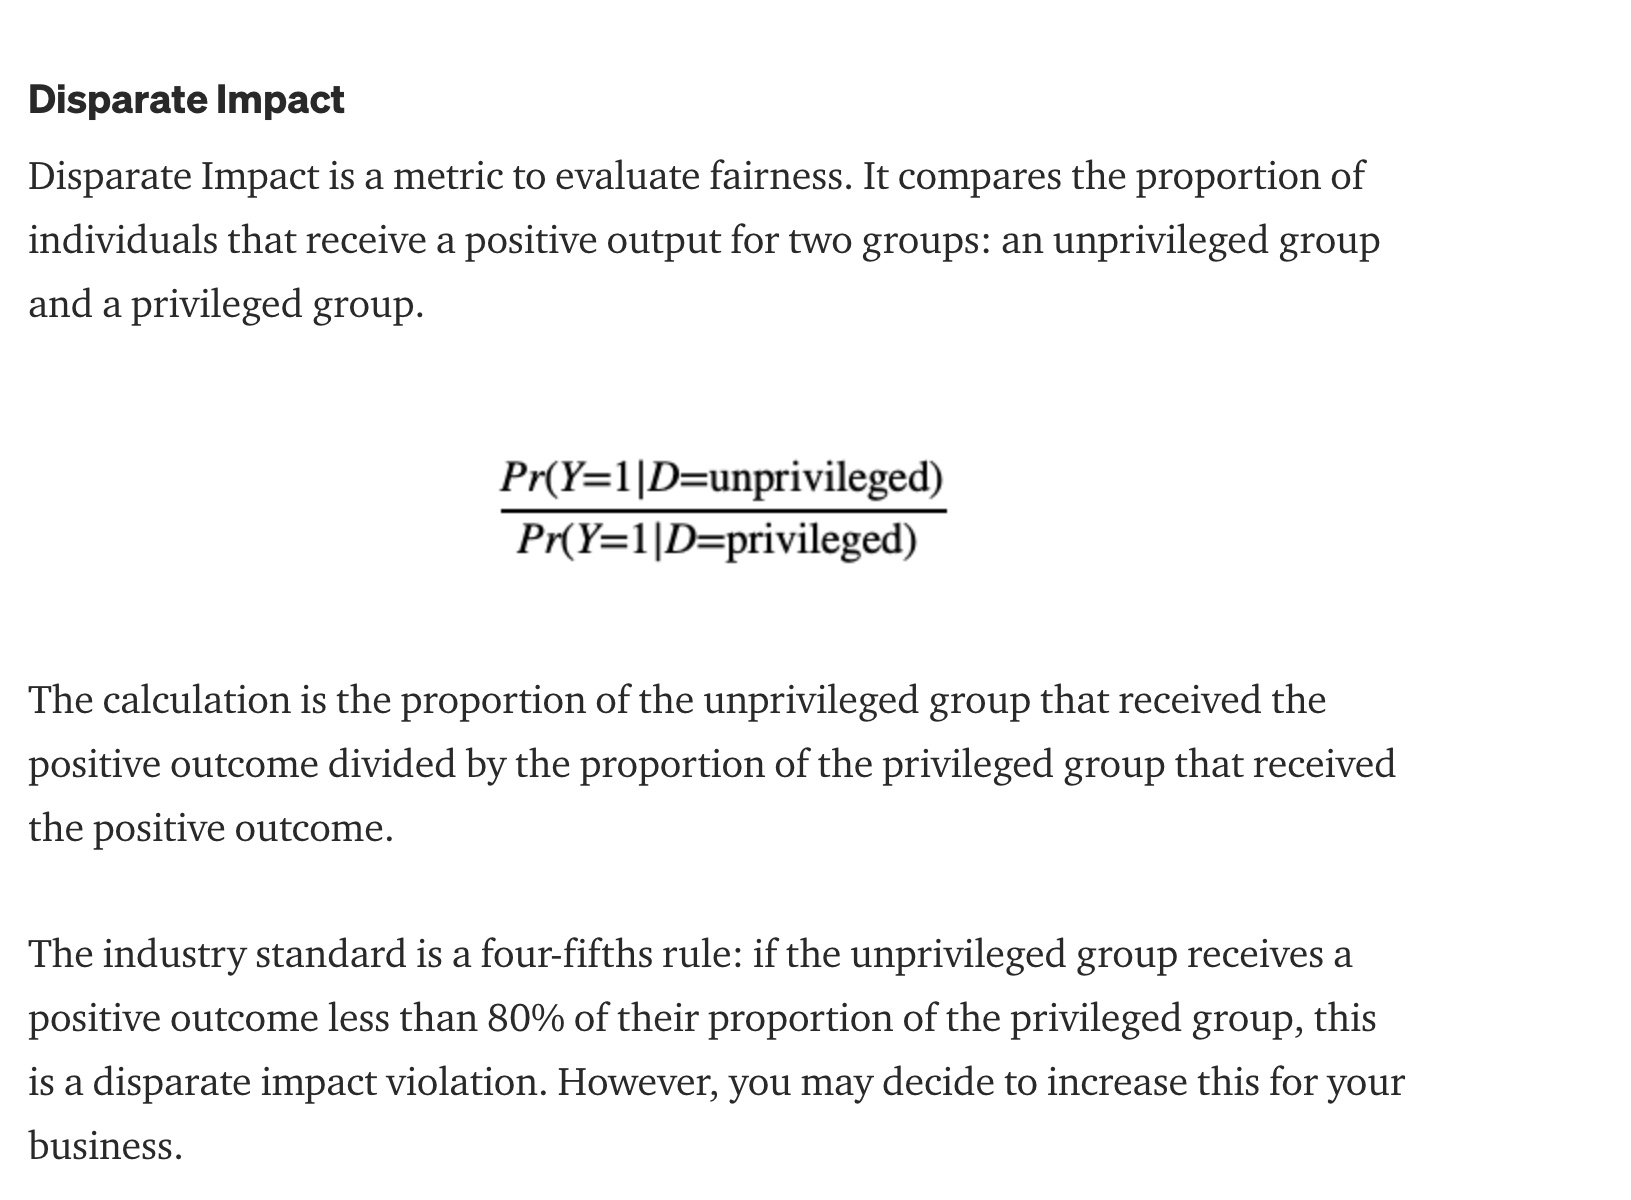

In [52]:
Image(filename='aif360_disparate_impact.jpeg')

In [53]:
df_blmetrics.disparate_impact()

0.33805741580535675

### Statistical Parity Difference

(Source:https://aif360.mybluemix.net/)

- Ryan's representation used P- Value and the Chi Test as indicators of initial bias. In AIF360, in addition to the disparity ratio, the statistical _parity is clearly showing that the unprivileged group are way less than privigled groups when it comes to receveing good credit risk, in other words, has on average a 38% lower positive target outcome.
- In Ryan's the statistical parity difference can be calculated from the contingency table, as substraction of the  (0.576994-0.19 ) = 0.38, providing exactly the same result as this AIF360 function. 

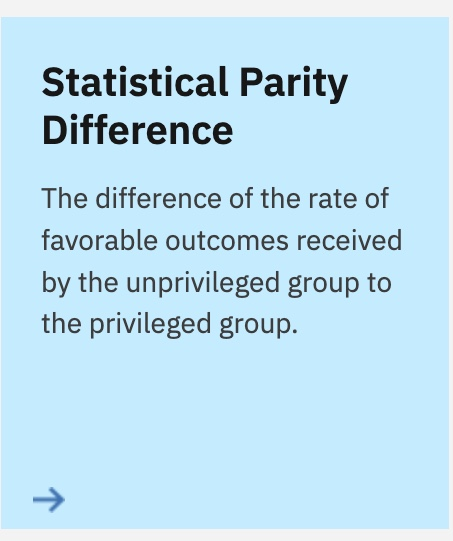

In [54]:
Image(filename='aif360_statistical_parity_difference.jpeg')

### Exploration of additional methods that BinaryLabelDatasetMetric provides

In [55]:
# Overall count of positives for whole dataset
df_blmetrics.num_positives()

38614.0

In [56]:
# Privileged group count of positive Target
df_blmetrics.num_positives(privileged=True)

28867.0

In [57]:
# Unprivileged group count of positive Target
df_blmetrics.num_positives(privileged=False)

9747.0

In [58]:
# other functions exploration
df_blmetrics.consistency()

array([0.913862])

In [59]:
# other functions exploration 
df_blmetrics.base_rate()

0.38614

### Let's retrieve here the results from the SQLite3 database from Ryan's fairdetect

In [60]:
data_credit.model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [61]:
queryR = "SELECT * FROM fairdetect_results \
                    WHERE filename = "+ "'"+data_credit.data_filename+"'"+\
                    " AND target_var = "+"'"+data_credit.target_var+"'"+\
                    " AND method = 'identify_bias'"+ \
                    " AND ml_model = "+'"'+str(data_credit.ml_model_desc2)+'" '
try:
    data_credit.read_results_from_db(queryR)
    display(data_credit.read_results_from_db(queryR))
except:
    print("bad sql query or database not set up correctly")


filename target_var               analysis_date  \
0  synthetic_credit_card_approval.csv     Target  2022-07-31 22:36:31.151844   
1  synthetic_credit_card_approval.csv     Target  2022-07-31 22:36:31.119929   
2  synthetic_credit_card_approval.csv     Target  2022-07-31 22:36:31.115940   
3  synthetic_credit_card_approval.csv     Target  2022-07-31 22:36:31.112948   
4  synthetic_credit_card_approval.csv     Target  2022-07-31 22:36:31.109956   
5  synthetic_credit_card_approval.csv     Target  2022-07-31 22:36:31.106960   
6  synthetic_credit_card_approval.csv     Target  2022-07-31 22:36:31.102971   
7  synthetic_credit_card_approval.csv     Target  2022-07-31 22:36:31.099979   
8  synthetic_credit_card_approval.csv     Target  2022-07-31 22:36:31.095991   
9  synthetic_credit_card_approval.csv     Target  2022-07-31 22:36:30.992234   

          method                                           ml_model  \
0  identify_bias  XGBClassifier(base_score=None, booster=None, c...   
1  identify_bias  XGBClassifier(base_score=None, booster=None, c...   
2  identify_bias  XGBClassifier(base_score=None, booster=None, c...   
3  identify_bias  XGBClassifier(base_score=None, booster=None, c...   
4  identify_bias  XGBClassifier(base_score=None, booster=None, c...   
5  identify_bias  XGBClassifier(base_score=None, booster=None, c...   
6  identify_bias  XGBClassifier(base_score=None, booster=None, c...   
7  identify_bias  XGBClassifier(base_score=None, booster=None, c...   
8  identify_bias  XGBClassifier(base_score=None, booster=None, c...   
9  identify_bias  XGBClassifier(base_score=None, booster=None, c...   

                                     metric  \
0       p-value chi2 precision - Predictive   
1                             FNR - Ability   
2                             TNR - Ability   
3                             FPR - Ability   
4                             TPR - Ability   
5                Chi2 test on FNR - Ability   
6                Chi2 test on TNR - Ability   
7                Chi2 test on FPR - Ability   
8                Chi2 test on TPR - Ability   
9  p-value chi2 cont table - Representation   

                                              result  \
0                                           0.700438   
1  {'Group 0': 0.0728429260285216, 'Group 1': 0.0...   
2  {'Group 0': 0.9817268726847823, 'Group 1': 0.9...   
3  {'Group 0': 0.01827312731521766, 'Group 1': 0....   
4  {'Group 0': 0.9271570739714784, 'Group 1': 0.9...   
5                                           0.104067   
6                                           0.931995   
7                                           0.588169   
8                                           0.715922   
9                                                0.0   

                                            comments  
0  Accept H0: No Significant Predictive Disparity...  
1                 Confusion Matrix Metrics - Ability  
2                 Confusion Matrix Metrics - Ability  
3                 Confusion Matrix Metrics - Ability  
4                 Confusion Matrix Metrics - Ability  
5                                                     
6                                                     
7                                                     
8                                                     
9  *** Reject H0: Significant Relation Between Gr...

# Step 5: ClassificationMetric Methods Exploration 

- First of all, lets check help documentation on this new class.
- As can be observed, in this case we need to create two BinaryLabelDataset objects. One for the real outcome, and the other with the predicted outcome.
- For each, we need to pass the favorable label which is 1, the unfavorable label which is 0, the label or response name, which is Target, and the protected attribute name, which is Group
- Once those are created, ClassificationMetric object is created.

In [62]:
help(ClassificationMetric)

Help on class ClassificationMetric in module aif360.metrics.classification_metric:

class ClassificationMetric(aif360.metrics.binary_label_dataset_metric.BinaryLabelDatasetMetric)
 |  ClassificationMetric(dataset, classified_dataset, unprivileged_groups=None, privileged_groups=None)
 |  
 |  Class for computing metrics based on two BinaryLabelDatasets.
 |  
 |  The first dataset is the original one and the second is the output of the
 |  classification transformer (or similar).
 |  
 |  Method resolution order:
 |      ClassificationMetric
 |      aif360.metrics.binary_label_dataset_metric.BinaryLabelDatasetMetric
 |      aif360.metrics.dataset_metric.DatasetMetric
 |      aif360.metrics.metric.Metric
 |      abc.ApplyDecorator
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, dataset, classified_dataset, unprivileged_groups=None, privileged_groups=None)
 |      Args:
 |          dataset (BinaryLabelDataset): Dataset containing ground-truth
 |              

In [63]:
df_bl_test_orig = aif360.datasets.BinaryLabelDataset(favorable_label = 1,
                                           unfavorable_label = 0,
                                           df = orig_test_data,
                                           label_names = ['Target'], 
                                           protected_attribute_names = ['Group'])


print(" Successfully conversion of  test dataset to the : ",type(df_bl_test_orig))

 Successfully conversion of  test dataset to the :  <class 'aif360.datasets.binary_label_dataset.BinaryLabelDataset'>


In [64]:
df_bl_test_pred = aif360.datasets.BinaryLabelDataset(favorable_label = 1,
                                           unfavorable_label = 0,
                                           df = pred_test_data,
                                           label_names = ['Target'], 
                                           protected_attribute_names = ['Group'])

print(" Successfully conversion of predicted/ classified dataset to the : ",type(df_bl_test_pred))

 Successfully conversion of predicted/ classified dataset to the :  <class 'aif360.datasets.binary_label_dataset.BinaryLabelDataset'>


In [65]:
df_bl_classif_metrics = ClassificationMetric(df_bl_test_orig, df_bl_test_pred, unprivileged_groups=u, privileged_groups=p)

print(" Successfully creation of the object for the Classification Class : ",df_bl_classif_metrics)

 Successfully creation of the object for the Classification Class :  <aif360.metrics.classification_metric.ClassificationMetric object at 0x00000204888340A0>


### Metric 1: Accuracy

In [66]:
# Overall Accuracy of Test dataset
print("Overall Accuracy of test set:", df_bl_classif_metrics.accuracy())
print("****************************************************************")
# Accuracy of test set only for privileged group
print("Accuracy of test set only for privileged group:", df_bl_classif_metrics.accuracy(privileged=True))
print("****************************************************************")
# Accuracy of test set only for unprivileged group
print("Accuracy of test set only for unprivileged group:", df_bl_classif_metrics.accuracy(privileged=False))
print("****************************************************************")

Overall Accuracy of test set: 0.97263
****************************************************************
Accuracy of test set only for privileged group: 0.9741754947031781
****************************************************************
Accuracy of test set only for unprivileged group: 0.9710826495897539
****************************************************************


- To check consistency, let us remember Ryan's accuracy figures with XGboost in Testing dataset which coincides perfectly with these figures here (0.97263).

### Metric 2: Average Odds Difference

In [67]:
# Average Odds Difference
print("Average Odds Difference:", df_bl_classif_metrics.average_odds_difference())

Average Odds Difference: -0.031071509841464923


### Metric 3: Confusion Matrix and TP, FP, TN and FN

In [68]:
# Overall confusion matrix for test set 
print("Overall confusion matrix for test set- By Count :",df_bl_classif_metrics.binary_confusion_matrix())
print("****************************************************************************************")
# Confusion matrix for privileged test set
print("Confusion matrix for privileged test set-By Count:",df_bl_classif_metrics.binary_confusion_matrix(privileged=True))
print("****************************************************************************************")
# Confusion matrix for unprivileged test set
print("Confusion matrix for unprivileged test set-By Count:",df_bl_classif_metrics.binary_confusion_matrix(privileged=False))
print("****************************************************************************************")

Overall confusion matrix for test set- By Count : {'TP': 37251.0, 'FP': 1374.0, 'TN': 60012.0, 'FN': 1363.0}
****************************************************************************************
Confusion matrix for privileged test set-By Count: {'TP': 28214.0, 'FP': 639.0, 'TN': 20524.0, 'FN': 653.0}
****************************************************************************************
Confusion matrix for unprivileged test set-By Count: {'TP': 9037.0, 'FP': 735.0, 'TN': 39488.0, 'FN': 710.0}
****************************************************************************************


- Ryan's calculates the Rate, so to compare the confusion matrix results from Ryans Vs. AI360:
The following clearly shows that confusion matrix results inline with Ryan's results - 

In [69]:
# Overall confusion matrix for test set 
print("Overall confusion matrix for test set:",df_bl_classif_metrics.performance_measures())

print("****************************************************************************************")

Overall confusion matrix for test set: {'TPR': 0.9647019215828456, 'TNR': 0.9776170462320399, 'FPR': 0.02238295376796012, 'FNR': 0.0352980784171544, 'GTPR': 0.9647019215828456, 'GTNR': 0.9776170462320399, 'GFPR': 0.02238295376796012, 'GFNR': 0.0352980784171544, 'PPV': 0.9644271844660194, 'NPV': 0.9777922606924644, 'FDR': 0.03557281553398058, 'FOR': 0.02220773930753564, 'ACC': 0.97263}
****************************************************************************************


- In addition we can obtain the confusion matrix for both privileged and unprivileged test sets:

In [70]:
# Confusion matrix for privileged test set
print("Confusion matrix for privileged test set:",df_bl_classif_metrics.performance_measures(privileged=True))

print("****************************************************************************************")


Confusion matrix for privileged test set: {'TPR': 0.9773790140991444, 'TNR': 0.9698057931295185, 'FPR': 0.0301942068704815, 'FNR': 0.022620985900855647, 'GTPR': 0.9773790140991444, 'GTNR': 0.9698057931295185, 'GFPR': 0.0301942068704815, 'GFNR': 0.022620985900855647, 'PPV': 0.9778532561605379, 'NPV': 0.9691646597723946, 'FDR': 0.0221467438394621, 'FOR': 0.03083534022760542, 'ACC': 0.9741754947031781}
****************************************************************************************


In [71]:
# Confusion matrix for unprivileged test set
print("Confusion matrix for unprivileged test set:",df_bl_classif_metrics.performance_measures(privileged=False))

print("****************************************************************************************")

Confusion matrix for unprivileged test set: {'TPR': 0.9271570739714784, 'TNR': 0.9817268726847823, 'FPR': 0.01827312731521766, 'FNR': 0.07284292602852159, 'GTPR': 0.9271570739714784, 'GTNR': 0.9817268726847823, 'GFPR': 0.01827312731521766, 'GFNR': 0.07284292602852159, 'PPV': 0.9247851002865329, 'NPV': 0.9823374297228717, 'FDR': 0.07521489971346705, 'FOR': 0.017662570277128215, 'ACC': 0.9710826495897539}
****************************************************************************************


### Metric 4: Precision

In [72]:
# Overall Precision of test set
print("Overall Precision of test set:", df_bl_classif_metrics.precision())
# Precision of test set only for privileged group
print("Precision of test set only for privileged group:", df_bl_classif_metrics.precision(privileged=True))
# Precision of test set only for unprivileged group
print("Precision of test set only for unprivileged group:", df_bl_classif_metrics.precision(privileged=False))

Overall Precision of test set: 0.9644271844660194
Precision of test set only for privileged group: 0.9778532561605379
Precision of test set only for unprivileged group: 0.9247851002865329


In [73]:
# Results from sklearn
from sklearn.metrics import precision_score
print("Overall Precision Score", precision_score(y_test, y_test_pred))
print("Group1 Precision Score", precision_score(orig_test_data['Target'][orig_test_data['Group']==1], 
                        pred_test_data['Target'][pred_test_data['Group']==1]))
print("Group0 Precision Score", precision_score(orig_test_data['Target'][orig_test_data['Group']==0], 
                      pred_test_data['Target'][pred_test_data['Group']==0]))
print("Equiv to Ryan, 1- Group1 Precision Score", precision_score(orig_test_data['Target'][orig_test_data['Group']==1], 
                        pred_test_data['Target'][pred_test_data['Group']==1]))
print("Equiv to Ryan, 1- Group0 Precision Score", precision_score(orig_test_data['Target'][orig_test_data['Group']==0], 
                      pred_test_data['Target'][pred_test_data['Group']==0]))

Overall Precision Score 0.9644271844660194
Group1 Precision Score 0.9778532561605379
Group0 Precision Score 0.9247851002865329
Equiv to Ryan, 1- Group1 Precision Score 0.9778532561605379
Equiv to Ryan, 1- Group0 Precision Score 0.9247851002865329


- Note that these results are totally equivalent to Ryan's, since in Ryan's both these plus the complementary (1 minus precision) are shown and compared statistically.

### Other metrics: Sensitivity
- AIF360 provides a handful amount of different metrics, to show another one, sensitivity is calculated next.

In [74]:
df_bl_classif_metrics.sensitivity()

0.9647019215828456

### Metrics interpretation

- False Negative Rate: As already seen in Ryan's output, FNR is 7.28% in the unprivileged case vs 2.26% for the privileged case, showing the quite important difference, and potential for bias.
- Average Odds Difference is the average of difference in false positive rates and true positive rates between unprivileged and privileged groups. For an unbiased case, of equal benefit, it should be zero. In this case the value is -0.03, indicating a 3% benefit for the privileged vs the unprivileged group.
- Regarding model testing accuracy, it is interesting to see that the unprivileged group has a slightly lower value vs the privileged group. Indicating a higher mismatch. It is even better seen with the precision (or equivalently 1 - precision), 

# Concluding Remarks for AIF360 and FairDetect as tools for bias

- Both fairdetect and AIF360 are great tools to start studying bias already in the dataset and the ones introduced or enhanced by the modelling phase.
- Fairdetect contains very useful statistical p-tests that help to interpret the results. This is an advantage of fairdetect vs AIF360.
- On the other hand AIF360 provides a handful and more extense list of metrics to be applied to dataset and constitutes a comprehensive tool that also includes correction or mitigation of bias in the postprocessing phase, which helps greatly for having a complete pipeline.
- In conclusion, both tools are complementary to each other and equivalent in terms of the common outputs that we have studied.